<a href="https://colab.research.google.com/github/MitehReddy/AIML-2025/blob/main/LAB05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train=pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
d=train.describe(percentiles=[.25,.5])
d

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Bar plot of the count of numeric features')

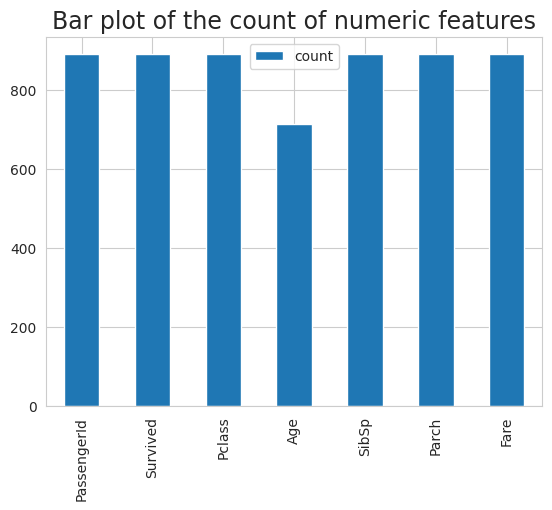

In [19]:
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

<Axes: xlabel='Survived', ylabel='count'>

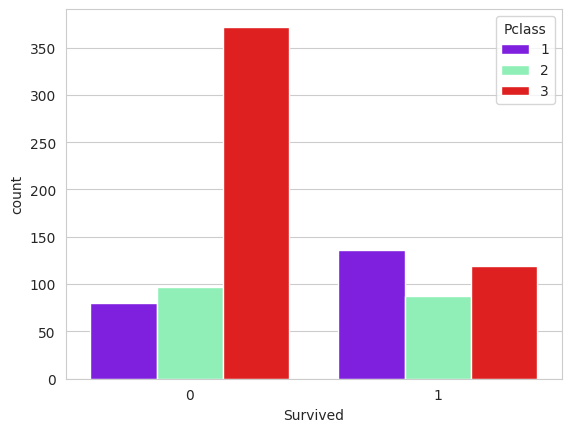

In [20]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Pclass",data=train,palette="rainbow")
#sns.paiplot(train)

Text(0.5, 1.0, 'Fraction of passengers survived ny class')

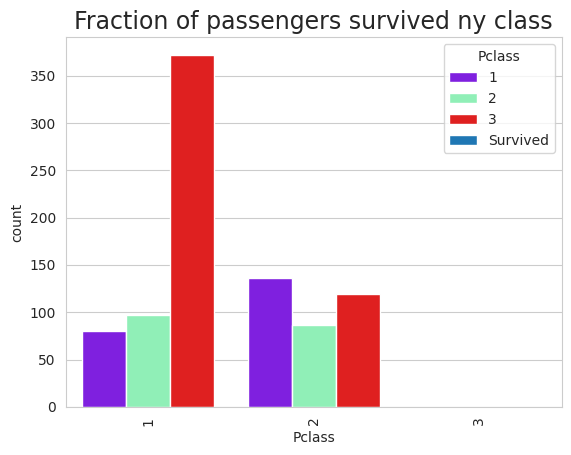

In [21]:
f_class_survived=train.groupby('Pclass')['Survived'].mean()
f_class_survived = pd.DataFrame(f_class_survived)
f_class_survived
f_class_survived.plot.bar(y='Survived')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
plt.title("Fraction of passengers survived ny class",fontsize=17)

Text(0.5, 0, 'Passenger Class')

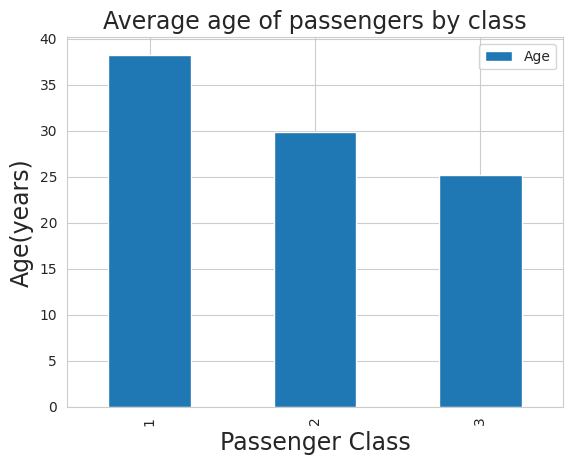

In [23]:
f_class_Age=train.groupby('Pclass')['Age'].mean()
f_class_Age = pd.DataFrame(f_class_Age)
f_class_Age.plot.bar(y='Age')
plt.title("Average age of passengers by class",fontsize=17)
plt.ylabel("Age(years)", fontsize=17)
plt.xlabel("Passenger Class", fontsize=17)

In [26]:
a=list(f_class_Age['Age'])

def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.insull(Age):
    if Pclass == 1:
      return a[0]
    elif Pclass == 2:
      return a[1]
    else:
      return a[2]
  else:
    return Age


In [28]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
d=train.describe()
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

<ipython-input-26-c72684e493a9>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-26-c72684e493a9>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


AttributeError: module 'pandas' has no attribute 'insull'

In [29]:
train.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)
train.dropna(inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [30]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [31]:
train.drop(['Sex','Embarked'],axis=1,inplace=True)
train=pd.concat([train,sex,embark],axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
nsimu=201
penalty=[0]*nsimu
longmodel=[0]*nsimu
predictions=[0]*nsimu
class_report=[0]*nsimu
f1=[0]*nsimu
for i in range(1,nsimu):
  longmodel[i] = (LogisticRegression(C=i/1000,tol=1e-4,max_iter=int(1e6),n_jobs=4))
  predictions[i]=longmodel[i].fit(X_train,y_train).predict(X_test)
  class_report[i]=classification_report(y_test,predictions[i],output_dict=True)
  l=class_report[i].split()
  f1[i]=l(len(l)-2)
  penalty[i]=1000/i

plt.scatter(penalty[l:len(penalty)-2],f1[l:len(f1)

SyntaxError: incomplete input (<ipython-input-33-edf80c6420c8>, line 17)